### Type: Supervised Learning
### SubType: Classification
### Data Type: Structured
### Analytics Type: Predictive

# Predicting Car Acceptability Using Classification Algorithms

In [4]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import warnings
 warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('cars.csv')

In [6]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
for col in df:
    print(f'Column - {col}')
    print(df[col].unique())
    print('---')
    print(df[col].value_counts())
    print('--'*10)

Column - buying
['vhigh' 'high' 'med' 'low']
---
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------
Column - maint
['vhigh' 'high' 'med' 'low']
---
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------
Column - doors
['2' '3' '4' '5more']
---
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
--------------------
Column - persons
['2' '4' 'more']
---
persons
2       576
4       576
more    576
Name: count, dtype: int64
--------------------
Column - lug_boot
['small' 'med' 'big']
---
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
--------------------
Column - safety
['low' 'med' 'high']
---
safety
low     576
med     576
high    576
Name: count, dtype: int64
--------------------
Column - class
['unacc' 'acc' 'vgood' 'good']
---
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
---------



### **Feature Explanations**

| Column Name | Type        | Description |
|-------------|-------------|-------------|
| **buying**   | Categorical (Ordinal) | **Buying price** of the car — indicates the initial cost of purchasing the car. <br>Possible values: `vhigh` (very high), `high`, `med` (medium), `low`. |
| **maint**    | Categorical (Ordinal) | **Maintenance cost** of the car — ongoing cost to maintain the car. <br>Possible values: `vhigh`, `high`, `med`, `low`. |
| **doors**    | Categorical | Number of **doors** in the car. Helps assess practicality and size. <br>Possible values: `2`, `3`, `4`, `5more`. |
| **persons**  | Categorical (Ordinal) | Number of **passengers** the car can carry — a key factor in utility. <br>Possible values: `2`, `4`, `more`. |
| **lug_boot** | Categorical (Ordinal) | **Luggage boot size** — how much storage the car has. <br>Possible values: `small`, `med`, `big`. |
| **safety**   | Categorical (Ordinal) | **Safety level** of the car — essential for decision-making. <br>Possible values: `low`, `med`, `high`. |
| **class**    | Categorical (Target Variable) | The **acceptability** of the car based on all the above features. This is the label you’re predicting. <br>Possible values: `unacc` (unacceptable), `acc` (acceptable), `good`, `vgood` (very good). |


### Ordinal Encoding

In [13]:
df['buying'] = df['buying'].map({'vhigh': 3,
                                 'high':2,
                                 'med':1, 
                                 'low':0})

In [14]:
df['maint'] = df['maint'].map({'vhigh':3,
                               'high':2,
                               'med':1,
                               'low':0})

In [15]:
df['doors'] = df['doors'].map({'2': 0,
                               '3':1,
                               '4':2,
                               '5more':3})

In [16]:
df['persons'] = df['persons'].map({'2':0,
                                   '4':1,
                                   'more':2}).astype(int)

In [17]:
df['lug_boot'] = df['lug_boot'].map({'small':0,
                                     'med':1,
                                     'big':2}).astype(int)

In [18]:
df['safety'] = df['safety'].map({'low':0,
                                 'med':1,
                                 'high':2})

In [19]:
#Target Variable
df['class'] = df['class'].map({'unacc':0,
                               'acc':1,
                               'good':2,
                               'vgood':3})

In [20]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [21]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64



### Encoding Legend

| Feature     | Categories             | Encoding |
|-------------|------------------------|----------|
| `buying`    | low, med, high, vhigh  | 0, 1, 2, 3 |
| `maint`     | low, med, high, vhigh  | 0, 1, 2, 3 |
| `doors`     | 2, 3, 4, 5more         | 0, 1, 2, 3 |
| `persons`   | 2, 4, more             | 0, 1, 2   |
| `lug_boot`  | small, med, big        | 0, 1, 2   |
| `safety`    | low, med, high         | 0, 1, 2   |
| `class`     | unacc, acc, good, vgood| 0, 1, 2, 3 |


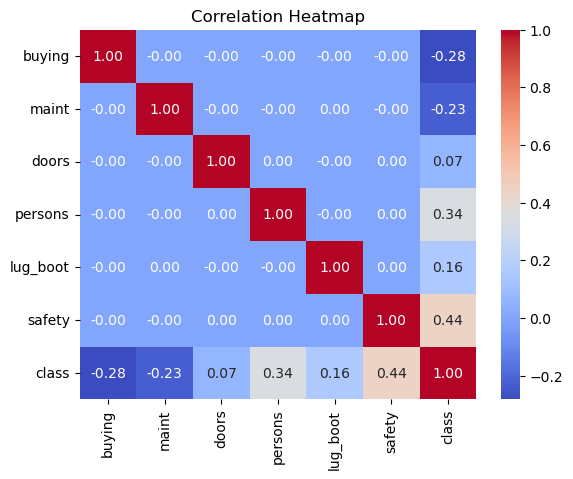

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection

In [25]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

# Modeling

## 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 0.829232995658466
Test Accuracy: 0.8323699421965318


In [33]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(model, X_train, y_train, cv=5,
                                  scoring='accuracy').mean())

CV Score: 0.8263145503060745


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       231
           1       0.69      0.68      0.68        84
           2       0.50      0.36      0.42        14
           3       1.00      0.82      0.90        17

    accuracy                           0.83       346
   macro avg       0.77      0.69      0.73       346
weighted avg       0.83      0.83      0.83       346



**Hyperparameter tuning using GridSearchCV**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],     
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  
    'max_iter': [100, 500, 1000, 2000],         

}



grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, 
                    cv=5, scoring='accuracy')

grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Predict with best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.8313896300947

Test Accuracy: 0.8410404624277457

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       231
           1       0.72      0.68      0.70        84
           2       0.57      0.57      0.57        14
           3       0.94      0.88      0.91        17

    accuracy                           0.84       346
   macro avg       0.78      0.76      0.77       346
weighted avg       0.84      0.84      0.84       346



#### No improvement after applying Hypertuning

## 2. Ridge Classifier

In [39]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

Hyperparameter Tuning

In [42]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

RidgeClassifier(alpha=10.0)

In [43]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the model
ridge = RidgeClassifier(alpha=10)
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=10)

In [44]:
ypred_train = ridge.predict(X_train)
ypred_test = ridge.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 0.7771345875542692
Test Accuracy: 0.7398843930635838


In [46]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(ridge, X_train, y_train, cv=5,scoring='accuracy').mean())

CV Score: 0.7771333647255795


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88       231
           1       0.48      0.43      0.45        84
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        17

    accuracy                           0.74       346
   macro avg       0.32      0.35      0.33       346
weighted avg       0.66      0.74      0.70       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


## 3. K Nearest Neighbour 

In [49]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

Scaling Data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Hyperparameter tuning for KNN classifier

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 100)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters:", grid_knn.best_params_)
print("Best Cross-Validation Score:", grid_knn.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Best Cross-Validation Score: 0.9573013132422957


KNN with Best HyperParameters

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6,
                          metric = 'euclidean',
                          weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

In [57]:
ypred_test = knn.predict(X_test)
ypred_train = knn.predict(X_train)

In [58]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
Test Accuracy: 0.953757225433526


In [59]:
from sklearn.model_selection import cross_val_score

print('CV Score:', cross_val_score(knn, X_train,y_train, cv=5, scoring='accuracy').mean())

CV Score: 0.9573013132422957


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       231
           1       0.90      0.93      0.91        84
           2       1.00      0.64      0.78        14
           3       1.00      0.76      0.87        17

    accuracy                           0.95       346
   macro avg       0.97      0.83      0.89       346
weighted avg       0.96      0.95      0.95       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


In [61]:
data = [[1,1,3,2,2,2]] 

data_scaled = scaler.transform(data) 

pred = knn.predict(data_scaled)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood


## Tree Based Classifiers

## 4. Random Forest 

In [64]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_


print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.976134044890912


In [67]:
rf = RandomForestClassifier(random_state =42, criterion = 'entropy',
                            max_depth = None, min_samples_leaf = 1,
                            min_samples_split = 2, n_estimators=200)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [68]:
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9855491329479769


In [70]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean())

CV Score: 0.976134044890912


In [71]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       0.98      0.96      0.97        84
           2       1.00      0.93      0.96        14
           3       0.85      1.00      0.92        17

    accuracy                           0.99       346
   macro avg       0.96      0.97      0.96       346
weighted avg       0.99      0.99      0.99       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


In [72]:
data = [[1,1,3,2,2,2]] 


pred = rf.predict(data)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood


## 5. Decision Tree Classifier

In [74]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

Hyperparameter Tuning using GridSearchCV

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid = GridSearchCV(tree, param_grid, cv=5)
grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.9790221315335114


In [78]:
tree = DecisionTreeClassifier(random_state=42, criterion = 'entropy',
                              max_depth=None, min_samples_leaf=1,
                              min_samples_split = 2)

tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [79]:
ypred_train = tree.predict(X_train)
ypred_test = tree.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
Test Accuracy: 0.976878612716763


In [81]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy').mean())

CV Score: 0.9790221315335114


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       231
           1       0.96      0.94      0.95        84
           2       0.87      0.93      0.90        14
           3       0.85      1.00      0.92        17

    accuracy                           0.98       346
   macro avg       0.92      0.97      0.94       346
weighted avg       0.98      0.98      0.98       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


In [83]:
data = [[1,1,3,2,2,3]] 


pred = tree.predict(data)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood


## 6. Gradient Boosting

In [85]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
ypred_train = gb.predict(X_train)
ypred_test = gb.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9971056439942113
Test Accuracy: 0.9826589595375722


In [90]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy').mean())

CV Score: 0.9862606602835766


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       231
           1       0.96      0.96      0.96        84
           2       0.93      0.93      0.93        14
           3       0.89      1.00      0.94        17

    accuracy                           0.98       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


In [92]:
data = [[1,1,3,2,2,2]] 


pred = gb.predict(data)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood


## 7. XGBoost Classifier

In [94]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df['class']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(xgb, param_grid, cv=5)
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV Accuracy: 0.9905927902474755


In [97]:
xgb = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.1,
                    max_depth = 5, n_estimators = 200, subsample = 0.8)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [98]:
ypred_train = xgb.predict(X_train)
ypred_test = xgb.predict(X_test) 

In [99]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:',accuracy_score(y_train, ypred_train))
print('Test Accuracy:',accuracy_score(y_test, ypred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9855491329479769


In [100]:
from sklearn.model_selection import cross_val_score

print('CV Score:',cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy').mean())

CV Score: 0.9920368335687751


In [101]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, ypred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       0.98      0.96      0.97        84
           2       0.93      0.93      0.93        14
           3       0.89      1.00      0.94        17

    accuracy                           0.99       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.99      0.99      0.99       346


Confusion Matrix:
 [[231   0   0   0]
 [  0  84   0   0]
 [  0   0  14   0]
 [  0   0   0  17]]


### Summary

| Algorithm           | Train Accuracy | Test Accuracy | CV Score   | Overfitting | Verdict / Notes                       |
| ------------------- | -------------- | ------------- | ---------- | ----------- | ------------------------------------- |
| **XGBoost**         | 1.000          | **0.9855**    | **0.9920** | ❌ No        | 🏆 Best Generalization & Top CV Score |
| Gradient Boosting   | 0.9971         | 0.9827        | 0.9863     | ❌ No        | High performance, great balance       |
| Random Forest       | 1.000          | 0.9855        | 0.9761     | ❌ No        | Excellent performance                 |
| Decision Tree       | 1.000          | 0.9769        | 0.9805     | ⚠️ Mild     | Slightly overfits                     |
| **KNN**             | 1.000          | 0.9538        | 0.9573     | ✅ Yes       | High variance, overfitting            |
| Logistic Regression | 0.8292         | 0.8324        | 0.8263     | ❌ No        | Basic baseline, not suitable          |
| Ridge Classifier    | 0.7771         | 0.7399        | 0.7771     | ❌ No        | Underperformed                        |




## Encoding Legend

| Feature     | Categories             | Encoding |
|-------------|------------------------|----------|
| `buying`    | low, med, high, vhigh  | 0, 1, 2, 3 |
| `maint`     | low, med, high, vhigh  | 0, 1, 2, 3 |
| `doors`     | 2, 3, 4, 5more         | 0, 1, 2, 3 |
| `persons`   | 2, 4, more             | 0, 1, 2   |
| `lug_boot`  | small, med, big        | 0, 1, 2   |
| `safety`    | low, med, high         | 0, 1, 2   |
| `class`     | unacc, acc, good, vgood| 0, 1, 2, 3 |


In [104]:
data = [[1,1,3,2,2,2]] 
# [buying=med, maint=med, doors=5more, 
#  persons=more, lug_boot=big, safety=high]

pred = xgb.predict(data)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood


In [105]:
import pickle

# Assuming 'xgb_model' is your trained XGBoost model
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb, f)
    
print("Model exported successfully!")


Model exported successfully!


In [106]:
import pickle

# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
# Now, you can use 'loaded_model' for predictions


In [107]:
data = [[1,1,3,2,2,2]] 
# [buying=med, maint=med, doors=5more, 
#  persons=more, lug_boot=big, safety=high]

pred = loaded_model.predict(data)
print("Predicted Label:", pred[0])

if pred[0] == 0:
    print('unacceptable')
elif pred[0] == 1:
    print('accceptable')
elif pred[0] == 2:
    print('good')
else:
    print('vgood')


Predicted Label: 3
vgood
